<a href="https://colab.research.google.com/github/Kunni123/EDA_Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load your dataset
df = pd.read_csv('train.csv')

In [5]:
# View first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# view few last Rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Statistical Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Checking categorical value counts
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


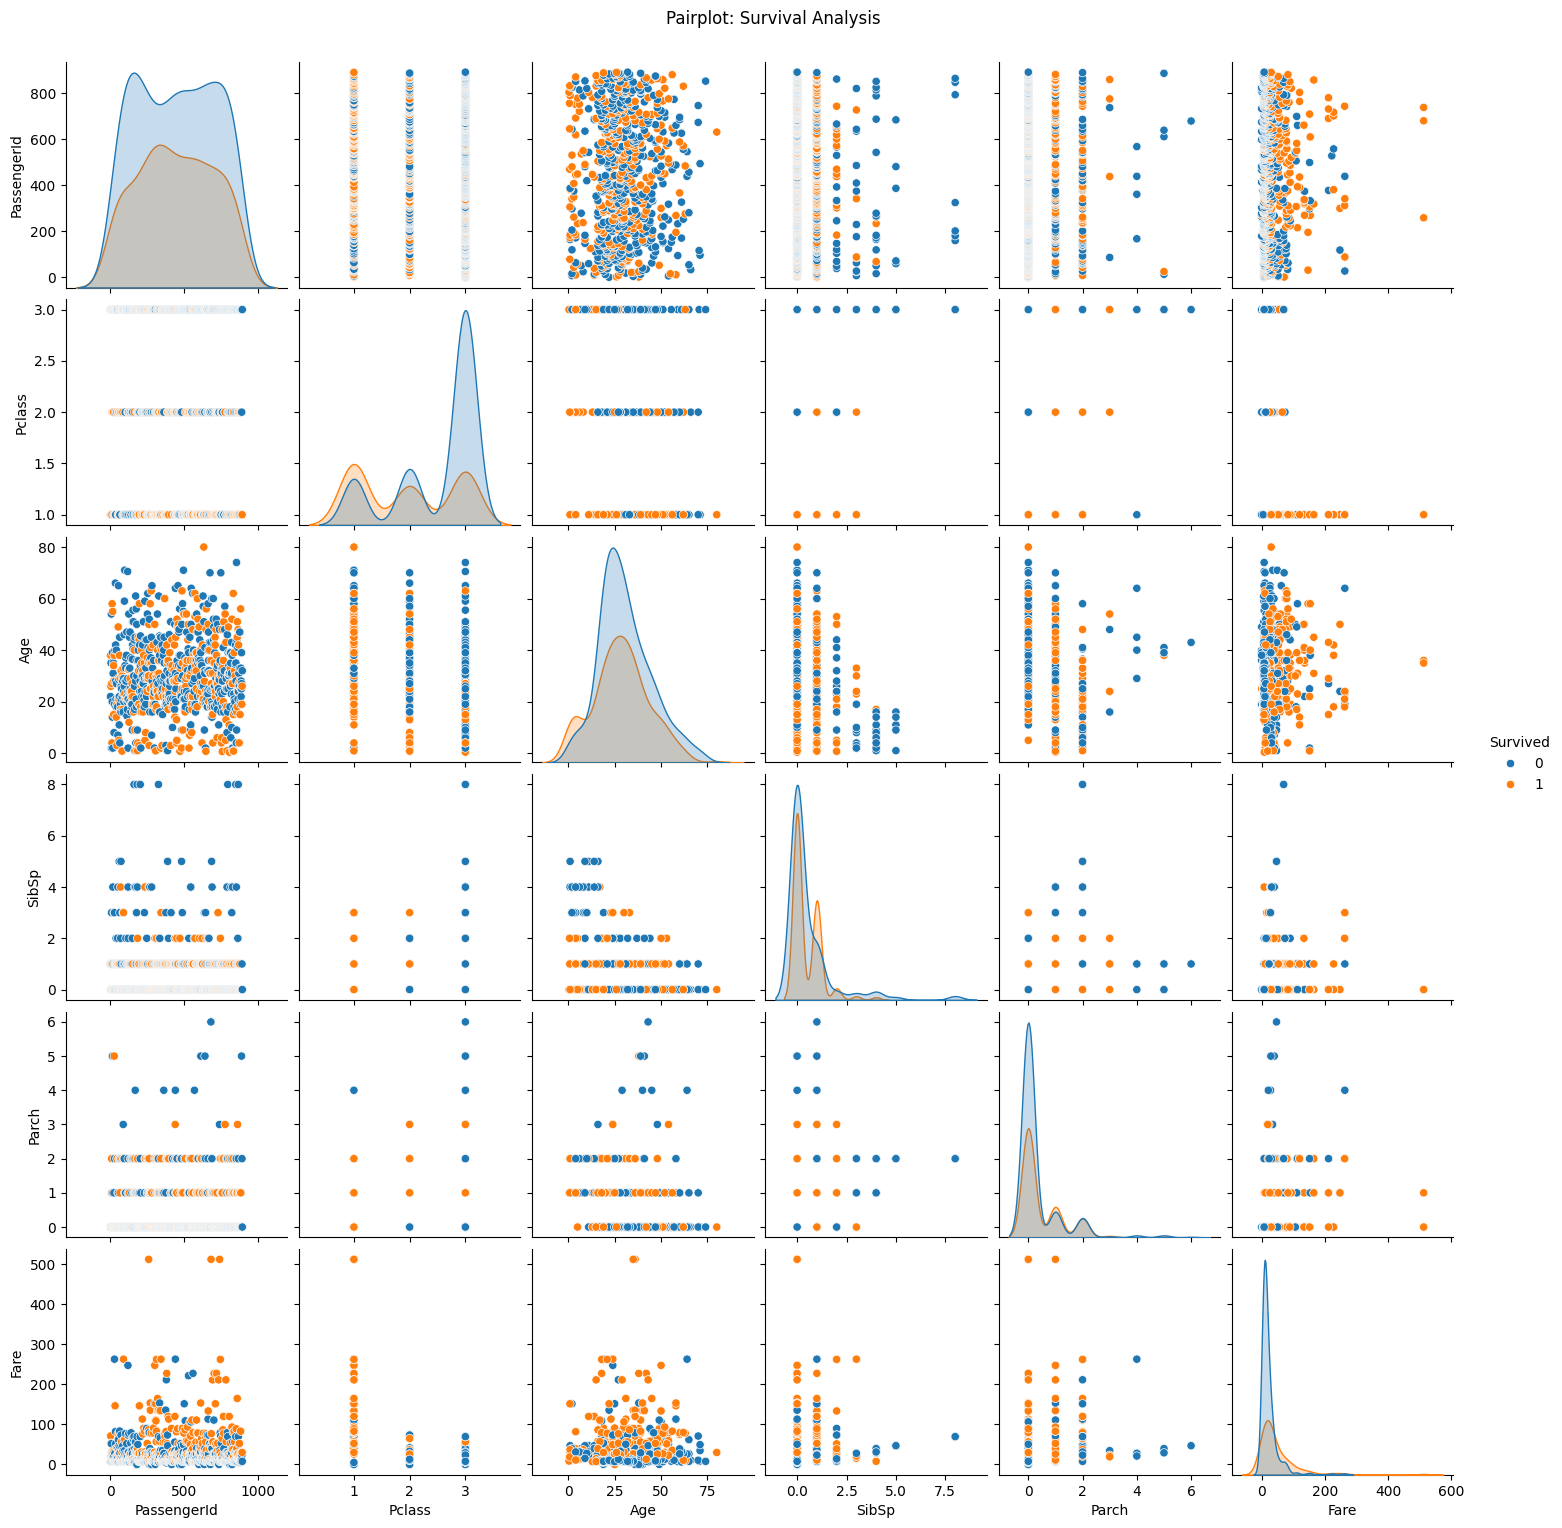

In [12]:
# Pairplot
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot: Survival Analysis', y=1.02)
plt.show()

 Observations:

-- Higher Fare passengers are more likely to survive.

-- Pclass 1 (first class) has higher survival.

In [17]:
 # Convert possible string columns to numeric
for col in ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [26]:
# Copy original dataframe
df_float = df.copy()

In [28]:
# Map categorical columns manually
df_float['Sex'] = df_float['Sex'].map({'male': 0, 'female': 1})
df_float['Embarked'] = df_float['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [29]:
#Drop columns that are pure strings (cannot be converted to numbers)
df_float = df_float.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [30]:
 #Now safely convert the entire dataframe to float
df_float = df_float.astype(float)

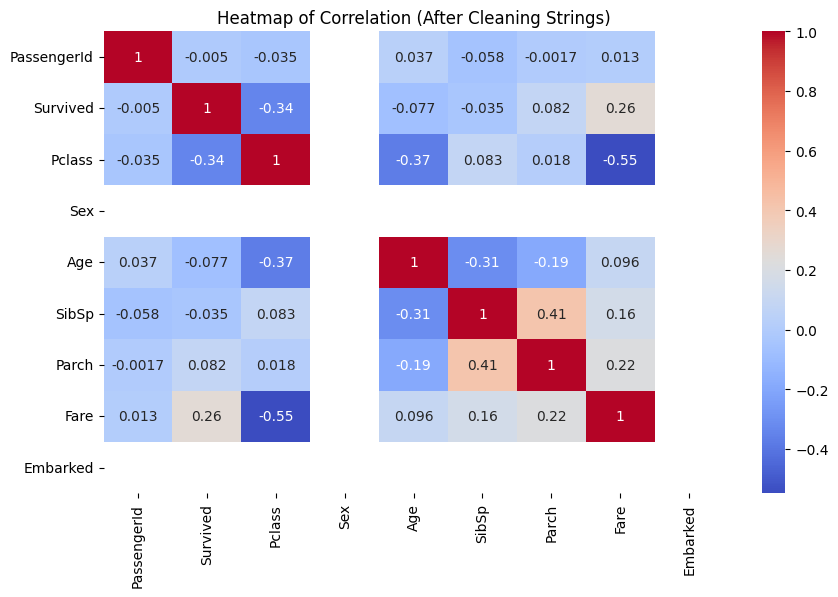

In [31]:
 # Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_float.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation (After Cleaning Strings)')
plt.show()

 Observations:

-- Strong negative correlation between Pclass and Fare

-- Moderate correlation between Fare and Survived.

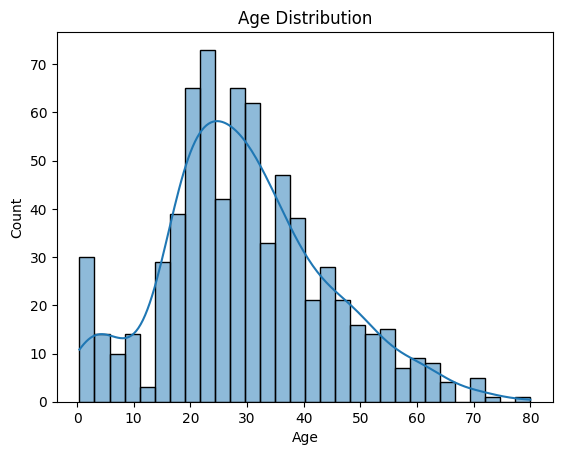

In [32]:
# Histogram of Age
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

Observations:

-- Most passengers were between 20–40 years old.

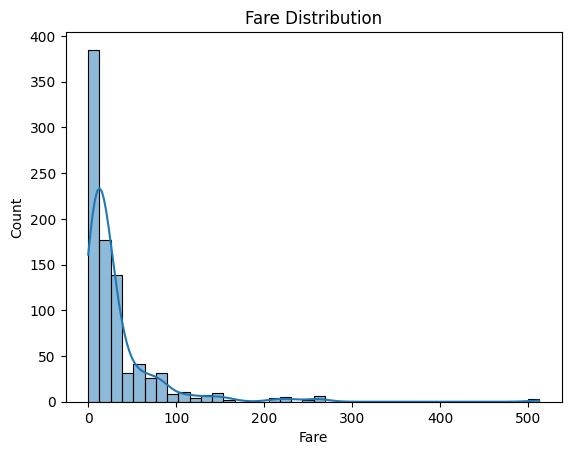

In [33]:
# Histogram of fare
sns.histplot(df['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()

Observation :

-- Majority paid a low fare (< 50).

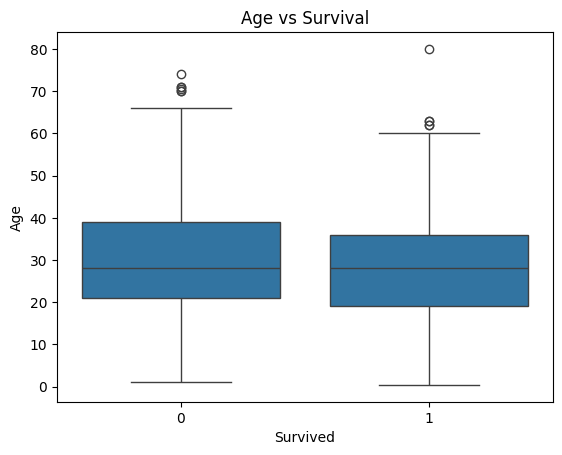

In [34]:
# Boxplot( Age VS Survived)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()

Observations:

-- Younger passengers had slightly better survival chances.

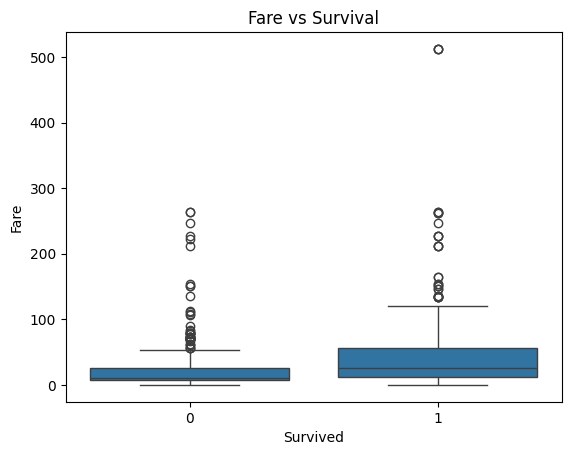

In [35]:
# Boxplot (Fare vs Survived)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.show()

Observations:

-- Survived passengers generally paid higher fares.

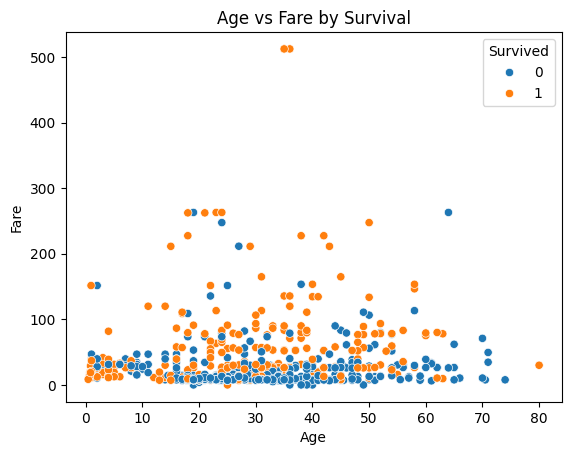

In [36]:
#Scatterplots(Age vs Fare)
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survival')
plt.show()

Observations:

-- High Fare + Lower Age → Higher survival.

-- Low Fare + Middle age group → Lower survival.






# Summary Of Findings

---
Age Distribution        
| Majority are between 20–40 years old

Fare Distribution      
| Most paid low fares; a few paid very high fares

Sex                     
| Females had better survival chances

Class (Pclass)          
| 1st class passengers had better survival

Correlations            
| Strong negative between Pclass and Fare

Key Factor in Survival  
| Higher fare, 1st class, being female, and being young